<a href="https://colab.research.google.com/github/ShreyJais/RL/blob/main/2348558_RL_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tracking Nonstationary Bandit Problem

##Epsilon-Greedy with Decay in Nonstationary Bandit Environment

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
class NonstationaryBanditEnv:
  def __init__(self, num_arms, initial_probs, drift_rate):
    self.num_arms = num_arms
    self.probs = np.array(initial_probs)
    self.drift_rate = drift_rate

  def step(self, action):
    reward = 1 if np.random.rand() < self.probs[action] else 0
    self._drift_probs()
    return reward

  def _drift_probs(self):
    drift = (np.random.rand(self.num_arms) - 0.5) * self.drift_rate #Update the drift by a random amount
    self.probs = np.clip(self.probs + drift, 0, 1)

In [5]:
class EpsilonGreedyAgent:
  def __init__(self, num_arms, initial_epsilon, decay_factor):
      self.num_arms = num_arms
      self.epsilon = initial_epsilon
      self.decay_factor = decay_factor
      self.counts = np.zeros(num_arms)
      self.values = np.zeros(num_arms)

  def select_action(self):
      if np.random.rand() < self.epsilon:
          return np.random.randint(self.num_arms)  # Explore
      else:
          return np.argmax(self.values)  # Exploit

  def update(self, action, reward):
      self.counts[action] += 1
      self.values[action] += (reward - self.values[action]) / self.counts[action]
      self.epsilon *= self.decay_factor  # Decay epsilon over time


In [6]:
num_arms = 5
initial_probs = [0.1, 0.3, 0.5, 0.7, 0.9]
drift_rate = 0.05
initial_epsilon = 0.1
decay_factor = 0.99

env = NonstationaryBanditEnv(num_arms, initial_probs, drift_rate)
agent = EpsilonGreedyAgent(num_arms, initial_epsilon, decay_factor)

num_steps = 5000
rewards = []
selected_actions = []

for step in range(num_steps):
    action = agent.select_action()
    reward = env.step(action)
    agent.update(action, reward)

    rewards.append(reward)
    selected_actions.append(action)

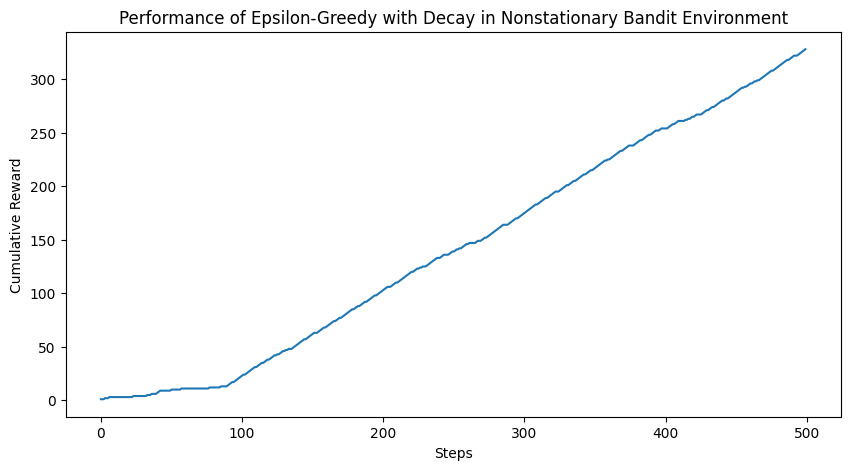

In [7]:
cumulative_rewards = np.cumsum(rewards)
plt.figure(figsize=(10, 5))
plt.plot(cumulative_rewards)
plt.xlabel("Steps")
plt.ylabel("Cumulative Reward")
plt.title("Performance of Epsilon-Greedy with Decay in Nonstationary Bandit Environment")
plt.show()